In [1]:
import os

import matplotlib.pyplot as plt
import pandas
import numpy
import matplotlib
from env import *
from visualiser import *
from main import *
from constants import *
import xlsxwriter
%matplotlib inline

pygame 2.0.1 (SDL 2.0.14, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
SENSOR_RANGE = 5

ROBOT_NUMBER = 9
DX = [-SENSOR_RANGE - ROBOT_RADIUS, 0, SENSOR_RANGE + ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, 0,
      SENSOR_RANGE + ROBOT_RADIUS, -ROBOT_RADIUS - SENSOR_RANGE, 0, ROBOT_RADIUS + SENSOR_RANGE]
DY = [-SENSOR_RANGE - ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, 0, 0, 0,
      SENSOR_RANGE + ROBOT_RADIUS, SENSOR_RANGE + ROBOT_RADIUS, SENSOR_RANGE + ROBOT_RADIUS]
env = Env(
	width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=ROBOT_NUMBER,
	obstacle_pos=OBSTACLE_POS,
	desired_X=DX, desired_Y=DY, sensor_range=SENSOR_RANGE, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
	sensor_detection_count=SENSOR_DETECTION_COUNT, buffer_size=MAX_T
	)

0
[5, 0.0, 1, 1, 0, 87.0, 55, 0.0049]
1
[5, 0.1, 1, 1, 0, 85.99567996484393, 56, 0.00499528846638134]
2
[5, 0.2, 1, 1, 0, 86.00613044474288, 56, 0.004989238340653527]
3
[5, 0.30000000000000004, 1, 1, 0, 85.99875549147306, 56, 0.004984235134138545]
4
[5, 0.4, 1, 1, 0, 86.02915940046566, 56, 0.004975203275514614]
5
[5, 0.5, 1, 1, 0, 86.0816379435065, 56, 0.004964525886848497]
6
[5, 0.6000000000000001, 1, 1, 0, 86.2312617141492, 56, 0.004946377782678929]
7
[5, 0.7000000000000001, 1, 1, 0, 86.32874958802216, 56, 0.004933368928557766]
8
[5, 0.8, 1, 1, 0, 85.05592218006193, 58, 0.0049668820314243915]
9
[5, 0.9, 1, 1, 0, 85.42217483218805, 58, 0.004958912264088735]
10
[5, 1.0, 1, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
11
[5, 1.1, 1, 1, 0, 85.2682314344279, 59, 0.005000745032790936]
12
[5, 1.2000000000000002, 1, 1, 0, 86.80013504600632, 56, 0.0049549994151660785]
13
[5, 1.3, 1, 1, 0, 85.30664382730656, 59, 0.005021098469174519]
14
[5, 1.4000000000000001, 1, 1, 0, 85.50055742928092,

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/2091902532.py:24: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


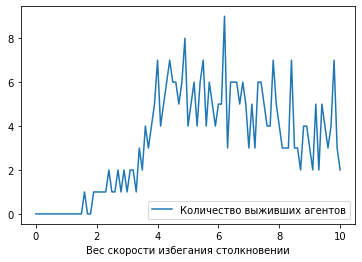

In [3]:

directory = 'run_w1'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w2 = 1
w3 = 1
run=0
for w1 in numpy.linspace(0, 10,101):
	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)

	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[1] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[5, 1, 0.0, 1, 0, 87.08545229267007, 55, 0.004938355264134978]
1
[5, 1, 0.1, 1, 0, 86.35118447128593, 56, 0.004983773781437465]
2
[5, 1, 0.2, 1, 0, 85.33959406950513, 58, 0.004975181953773348]
3
[5, 1, 0.30000000000000004, 1, 0, 85.27860692160635, 59, 0.004959764636517863]
4
[5, 1, 0.4, 1, 0, 85.21023380671788, 59, 0.004960544060115415]
5
[5, 1, 0.5, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
6
[5, 1, 0.6000000000000001, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
7
[5, 1, 0.7000000000000001, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
8
[5, 1, 0.8, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
9
[5, 1, 0.9, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
10
[5, 1, 1.0, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
11
[5, 1, 1.1, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
12
[5, 1, 1.2000000000000002, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
13
[5, 1, 1.3, 1, 0, 85.20899936544455, 59, 0.004961171884695712]
14
[5, 1, 1.4000000000000

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/1698933857.py:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


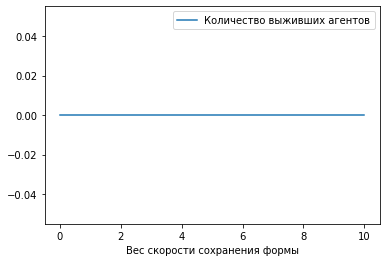

In [4]:

directory = 'run_w2'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 1
w3 = 1
run=0
for w2 in numpy.linspace(0, 10,101):
	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[2] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[5, 5, 0.0, 1, 9, 2.842170943040401e-14, 169, 0.02728691369256053]
1
[5, 5, 0.1, 1, 5, 0.05999999999996922, 10000, 0.09426749621560518]
2
[5, 5, 0.2, 1, 4, 0.0, 159, 0.016252551233480343]
3
[5, 5, 0.30000000000000004, 1, 4, 0.4724910497916191, 10000, 0.06178923131451503]
4
[5, 5, 0.4, 1, 5, 0.0, 161, 0.016468289983540777]
5
[5, 5, 0.5, 1, 5, 0.0, 180, 0.02117461527478185]
6
[5, 5, 0.6000000000000001, 1, 2, 0.0, 156, 0.014636539317454393]
7
[5, 5, 0.7000000000000001, 1, 3, 0.0, 164, 0.012439390933858032]
8
[5, 5, 0.8, 1, 5, 0.0, 157, 0.016927715905395276]
9
[5, 5, 0.9, 1, 7, 0.0, 162, 0.019244677254083874]
10
[5, 5, 1.0, 1, 4, 0.0, 198, 0.02307564774499378]
11
[5, 5, 1.1, 1, 3, 0.0, 155, 0.012674737110583385]
12
[5, 5, 1.2000000000000002, 1, 7, 0.0, 165, 0.01882613585133801]
13
[5, 5, 1.3, 1, 4, 0.0, 159, 0.013838191090599842]
14
[5, 5, 1.4000000000000001, 1, 8, 0.0, 164, 0.020300901699793258]
15
[5, 5, 1.5, 1, 8, 0.0, 165, 0.020239813454798427]
16
[5, 5, 1.6, 1, 3, 0.0, 159, 0.011922

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/3563432052.py:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


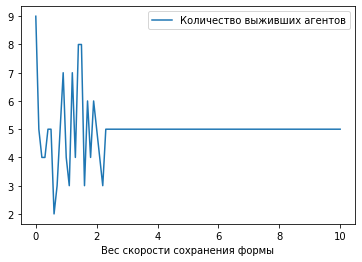

In [5]:

directory = 'run_w2_w15'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 5
w3 = 1
run=0
for w2 in numpy.linspace(0, 10,101):
	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[2] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))


0
[5, 1, 1, 0.0, 9, 140.0, 1, 0.0]
1
[5, 1, 1, 0.1, 8, 0.0, 1659, 0.0019185691049987614]
2
[5, 1, 1, 0.2, 3, 0.0, 814, 0.0021027534710286056]
3
[5, 1, 1, 0.30000000000000004, 2, 0.0, 536, 0.002423900277552062]
4
[5, 1, 1, 0.4, 1, 0.0, 389, 0.002576108632049552]
5
[5, 1, 1, 0.5, 1, 0.0, 315, 0.0031082108368370837]
6
[5, 1, 1, 0.6000000000000001, 0, 86.11924567088646, 111, 0.003082941297661892]
7
[5, 1, 1, 0.7000000000000001, 0, 85.47161541544197, 89, 0.0034969218093062024]
8
[5, 1, 1, 0.8, 0, 85.28044153324876, 74, 0.004027195132067713]
9
[5, 1, 1, 0.9, 0, 85.17630494533748, 66, 0.0045019030252684625]
10
[5, 1, 1, 1.0, 0, 85.20899936544455, 59, 0.004961171884695712]
11
[5, 1, 1, 1.1, 0, 87.34932747781228, 50, 0.005389548882355692]
12
[5, 1, 1, 1.2000000000000002, 0, 87.15355952362479, 46, 0.005887305203793846]
13
[5, 1, 1, 1.3, 0, 85.86147365098086, 44, 0.006441479397238277]
14
[5, 1, 1, 1.4000000000000001, 0, 86.80288926190886, 40, 0.00693206478764481]
15
[5, 1, 1, 1.5, 0, 87.423579559

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/54890275.py:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


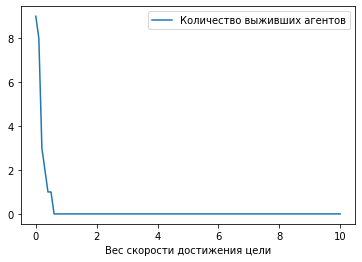

In [6]:

directory = 'run_w3'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 1
w2 = 1
run=0
for w3 in numpy.linspace(0, 10,101):
	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[3] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[5, 1, 0, 0.0, 9, 140.0, 1, 0.0]
1
[5, 1, 0, 0.1, 9, 2.842170943040401e-14, 1751, 0.00429010805969792]
2
[5, 1, 0, 0.2, 9, 0.0, 903, 0.005543065534691956]
3
[5, 1, 0, 0.30000000000000004, 9, 2.842170943040401e-14, 552, 0.0064328631498263775]
4
[5, 1, 0, 0.4, 5, 0.0, 409, 0.005496049119583943]
5
[5, 1, 0, 0.5, 3, 0.0, 314, 0.0046424882574620276]
6
[5, 1, 0, 0.6000000000000001, 1, 0.0, 268, 0.0038987531772685484]
7
[5, 1, 0, 0.7000000000000001, 0, 85.42424438055252, 85, 0.003669614426466997]
8
[5, 1, 0, 0.8, 0, 86.68800948408766, 69, 0.00402338408515981]
9
[5, 1, 0, 0.9, 0, 86.90441822021302, 61, 0.004488475674221104]
10
[5, 1, 0, 1.0, 0, 87.08545229267007, 55, 0.004938355264134978]
11
[5, 1, 0, 1.1, 0, 87.12939903790728, 50, 0.00543565122263764]
12
[5, 1, 0, 1.2000000000000002, 0, 86.04846342260886, 47, 0.005972957186811663]
13
[5, 1, 0, 1.3, 0, 86.66163796210176, 43, 0.006487436982899003]
14
[5, 1, 0, 1.4000000000000001, 0, 86.71828760915555, 40, 0.0069121868476221295]
15
[5, 1, 0, 1

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/554298186.py:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


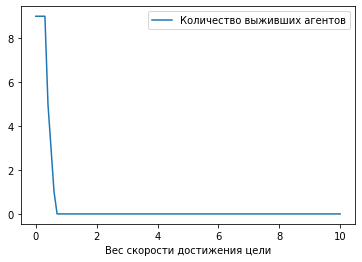

In [7]:

directory = 'run_w3_w20'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 1
w2 = 0
run=0
for w3 in numpy.linspace(0, 10,101):
	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[3] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[5, 5, 1, 0.0, 9, 140.0, 1, 0.0]
1
[5, 5, 1, 0.1, 9, 0.0, 1577, 0.005055506603009396]
2
[5, 5, 1, 0.2, 9, 0.0, 790, 0.007232940221309811]
3
[5, 5, 1, 0.30000000000000004, 9, 0.0, 537, 0.010692928860755454]
4
[5, 5, 1, 0.4, 9, 0.0, 399, 0.011661023373197087]
5
[5, 5, 1, 0.5, 9, 0.0, 325, 0.01595678230832093]
6
[5, 5, 1, 0.6000000000000001, 7, 0.0, 337, 0.022158531486879702]
7
[5, 5, 1, 0.7000000000000001, 9, 0.0, 317, 0.026631391269339225]
8
[5, 5, 1, 0.8, 8, 0.0, 203, 0.018798619692736926]
9
[5, 5, 1, 0.9, 5, 0.0, 179, 0.015764118386219876]
10
[5, 5, 1, 1.0, 4, 0.0, 198, 0.02307564774499378]
11
[5, 5, 1, 1.1, 3, 0.0, 144, 0.015713703481626116]
12
[5, 5, 1, 1.2000000000000002, 3, 0.0, 160, 0.019655151060455275]
13
[5, 5, 1, 1.3, 4, 0.0, 127, 0.016315908487899194]
14
[5, 5, 1, 1.4000000000000001, 3, 0.0, 119, 0.01540296613952658]
15
[5, 5, 1, 1.5, 4, 0.0, 113, 0.01826099068401975]
16
[5, 5, 1, 1.6, 4, 0.0, 104, 0.01936163991283609]
17
[5, 5, 1, 1.7000000000000002, 1, 0.0, 93, 0.0120772

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/890234995.py:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


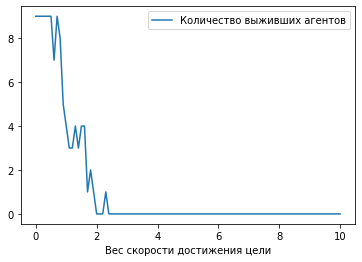

In [8]:

directory = 'run_w3_w15'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 5
w2 = 1
run=0
for w3 in numpy.linspace(0, 10,101):
	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[3] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[0.0, 1, 1, 1, 0, 140.0, 1, 0.0]
1
[0.1, 1, 1, 1, 0, 140.0, 1, 0.0]
2
[0.2, 1, 1, 1, 0, 140.0, 1, 0.0]
3
[0.30000000000000004, 1, 1, 1, 0, 140.0, 1, 0.0]
4
[0.4, 1, 1, 1, 0, 140.0, 1, 0.0]
5
[0.5, 1, 1, 1, 0, 140.0, 1, 0.0]
6
[0.6000000000000001, 1, 1, 1, 0, 90.0, 52, 0.0050000000000000235]
7
[0.7000000000000001, 1, 1, 1, 0, 90.0, 52, 0.005]
8
[0.8, 1, 1, 1, 0, 90.0, 52, 0.005002566545726181]
9
[0.9, 1, 1, 1, 0, 90.0, 52, 0.005007443247491596]
10
[1.0, 1, 1, 1, 0, 91.0, 51, 0.0049]
11
[1.1, 1, 1, 1, 0, 91.0, 51, 0.004900000000000011]
12
[1.2000000000000002, 1, 1, 1, 0, 91.0, 51, 0.0049]
13
[1.3, 1, 1, 1, 0, 91.0, 51, 0.004901482636260111]
14
[1.4000000000000001, 1, 1, 1, 0, 91.0, 51, 0.004904602015434825]
15
[1.5, 1, 1, 1, 0, 89.0, 53, 0.005039403544959844]
16
[1.6, 1, 1, 1, 0, 89.0, 53, 0.005037543966960975]
17
[1.7000000000000002, 1, 1, 1, 0, 89.0, 53, 0.005037799793139179]
18
[1.8, 1, 1, 1, 0, 89.03629821398505, 53, 0.005010890097494274]
19
[1.9000000000000001, 1, 1, 1, 0, 89.0216

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/1084778326.py:36: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


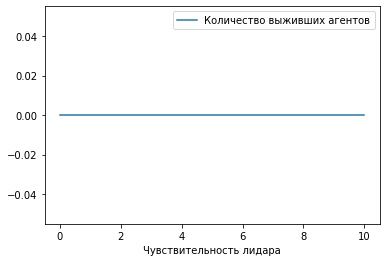

In [9]:

directory = 'run_s'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 1
w2 = 1
w3=1
run=0
for SENSOR_RANGE in numpy.linspace(0, 10,101):
	ROBOT_NUMBER = 9
	DX = [-SENSOR_RANGE - ROBOT_RADIUS, 0, SENSOR_RANGE + ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, 0,
      SENSOR_RANGE + ROBOT_RADIUS, -ROBOT_RADIUS - SENSOR_RANGE, 0, ROBOT_RADIUS + SENSOR_RANGE]
	DY = [-SENSOR_RANGE - ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, 0, 0, 0,
      SENSOR_RANGE + ROBOT_RADIUS, SENSOR_RANGE + ROBOT_RADIUS, SENSOR_RANGE + ROBOT_RADIUS]
	env = Env(
	width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=ROBOT_NUMBER,
	obstacle_pos=OBSTACLE_POS,
	desired_X=DX, desired_Y=DY, sensor_range=SENSOR_RANGE, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
	sensor_detection_count=SENSOR_DETECTION_COUNT, buffer_size=MAX_T
	)

	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[0] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[0.0, 5, 1, 1, 0, 140.0, 1, 0.0]
1
[0.1, 5, 1, 1, 0, 140.0, 1, 0.0]
2
[0.2, 5, 1, 1, 0, 140.0, 1, 0.0]
3
[0.30000000000000004, 5, 1, 1, 0, 140.0, 1, 0.0]
4
[0.4, 5, 1, 1, 0, 140.0, 1, 0.0]
5
[0.5, 5, 1, 1, 0, 140.0, 1, 0.0]
6
[0.6000000000000001, 5, 1, 1, 0, 89.99999999999935, 52, 0.005000000000000115]
7
[0.7000000000000001, 5, 1, 1, 0, 90.0, 52, 0.005]
8
[0.8, 5, 1, 1, 0, 89.99999999999972, 52, 0.005023249395297684]
9
[0.9, 5, 1, 1, 0, 89.99999999999994, 52, 0.005005740519424605]
10
[1.0, 5, 1, 1, 0, 91.0, 51, 0.0049]
11
[1.1, 5, 1, 1, 0, 90.99999999999979, 51, 0.004900000000000061]
12
[1.2000000000000002, 5, 1, 1, 0, 91.0, 51, 0.004899999999999999]
13
[1.3, 5, 1, 1, 0, 91.0, 51, 0.004911357954476087]
14
[1.4000000000000001, 5, 1, 1, 0, 91.0, 51, 0.0049166470319616]
15
[1.5, 5, 1, 1, 0, 89.0, 53, 0.0054660068451131165]
16
[1.6, 5, 1, 1, 0, 88.99999999999979, 53, 0.005506731960323515]
17
[1.7000000000000002, 5, 1, 1, 0, 89.0, 53, 0.00558466096461578]
18
[1.8, 5, 1, 1, 0, 88.638250877

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/717760614.py:36: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


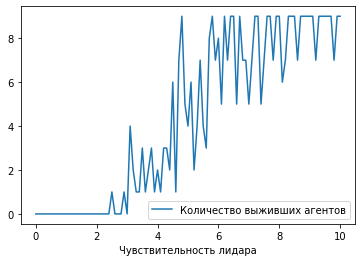

In [10]:

directory = 'run_s_w15'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 5
w2 = 1
w3=1
run=0
for SENSOR_RANGE in numpy.linspace(0, 10,101):
	ROBOT_NUMBER = 9
	DX = [-SENSOR_RANGE - ROBOT_RADIUS, 0, SENSOR_RANGE + ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, 0,
      SENSOR_RANGE + ROBOT_RADIUS, -ROBOT_RADIUS - SENSOR_RANGE, 0, ROBOT_RADIUS + SENSOR_RANGE]
	DY = [-SENSOR_RANGE - ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, -SENSOR_RANGE - ROBOT_RADIUS, 0, 0, 0,
      SENSOR_RANGE + ROBOT_RADIUS, SENSOR_RANGE + ROBOT_RADIUS, SENSOR_RANGE + ROBOT_RADIUS]
	env = Env(
	width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=ROBOT_NUMBER,
	obstacle_pos=OBSTACLE_POS,
	desired_X=DX, desired_Y=DY, sensor_range=SENSOR_RANGE, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
	sensor_detection_count=SENSOR_DETECTION_COUNT, buffer_size=MAX_T
	)

	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[0] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))


0
[0.0, 1, 1, 1, 0, 87.0, 55, 0.0049]
1
[0.1, 1, 1, 1, 0, 87.0, 55, 0.0049]
2
[0.2, 1, 1, 1, 0, 87.0, 55, 0.0049]
3
[0.30000000000000004, 1, 1, 1, 0, 87.0, 55, 0.0049]
4
[0.4, 1, 1, 1, 0, 87.0, 55, 0.0049]
5
[0.5, 1, 1, 1, 0, 87.0, 55, 0.0049]
6
[0.6000000000000001, 1, 1, 1, 0, 87.0, 55, 0.0049]
7
[0.7000000000000001, 1, 1, 1, 0, 87.0, 55, 0.0049]
8
[0.8, 1, 1, 1, 0, 87.0, 55, 0.0049]
9
[0.9, 1, 1, 1, 0, 87.0, 55, 0.0049]
10
[1.0, 1, 1, 1, 0, 87.0, 55, 0.0049]
11
[1.1, 1, 1, 1, 0, 87.0, 55, 0.004903128661379486]
12
[1.2000000000000002, 1, 1, 1, 0, 87.0, 55, 0.004906366768811188]
13
[1.3, 1, 1, 1, 0, 87.0, 55, 0.004909523310882364]
14
[1.4000000000000001, 1, 1, 1, 0, 87.0, 55, 0.00491255296674267]
15
[1.5, 1, 1, 1, 0, 87.0, 55, 0.0049154249692332196]
16
[1.6, 1, 1, 1, 0, 87.0, 55, 0.004918983663546676]
17
[1.7000000000000002, 1, 1, 1, 0, 87.0, 55, 0.004922053804156335]
18
[1.8, 1, 1, 1, 0, 87.0, 55, 0.004925261263767348]
19
[1.9000000000000001, 1, 1, 1, 0, 87.0, 55, 0.004928259707563319

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/2542421067.py:36: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


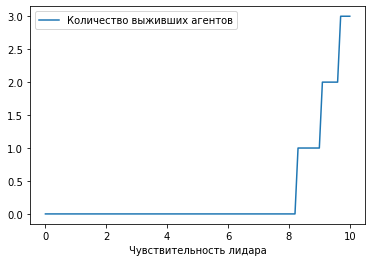

In [11]:

directory = 'run_s_5'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 1
w2 = 1
w3=1
run=0
for SENSOR_RANGE in numpy.linspace(0, 10,101):
	ROBOT_NUMBER = 9
	DX = [-5 - ROBOT_RADIUS, 0, 5 + ROBOT_RADIUS, -5 - ROBOT_RADIUS, 0,
      5 + ROBOT_RADIUS, -ROBOT_RADIUS - 5, 0, ROBOT_RADIUS + 5]
	DY = [-5 - ROBOT_RADIUS, -5 - ROBOT_RADIUS, -5 - ROBOT_RADIUS, 0, 0, 0,
      5 + ROBOT_RADIUS, 5 + ROBOT_RADIUS, 5 + ROBOT_RADIUS]
	env = Env(
	width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=ROBOT_NUMBER,
	obstacle_pos=OBSTACLE_POS,
	desired_X=DX, desired_Y=DY, sensor_range=SENSOR_RANGE, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
	sensor_detection_count=SENSOR_DETECTION_COUNT, buffer_size=MAX_T
	)

	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[0] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[0.0, 5, 1, 1, 0, 87.0, 55, 0.0049]
1
[0.1, 5, 1, 1, 0, 87.0, 55, 0.0049]
2
[0.2, 5, 1, 1, 0, 87.0, 55, 0.0049]
3
[0.30000000000000004, 5, 1, 1, 0, 87.0, 55, 0.0049]
4
[0.4, 5, 1, 1, 0, 87.0, 55, 0.0049]
5
[0.5, 5, 1, 1, 0, 87.0, 55, 0.0049]
6
[0.6000000000000001, 5, 1, 1, 0, 87.0, 55, 0.0049]
7
[0.7000000000000001, 5, 1, 1, 0, 87.0, 55, 0.0049]
8
[0.8, 5, 1, 1, 0, 87.0, 55, 0.0049]
9
[0.9, 5, 1, 1, 0, 87.0, 55, 0.0049]
10
[1.0, 5, 1, 1, 0, 87.0, 55, 0.0049]
11
[1.1, 5, 1, 1, 0, 87.0, 55, 0.0049144371863559045]
12
[1.2000000000000002, 5, 1, 1, 0, 87.0, 55, 0.004936535242729072]
13
[1.3, 5, 1, 1, 0, 86.86676328365348, 55, 0.00511341308009506]
14
[1.4000000000000001, 5, 1, 1, 0, 85.58512511160687, 57, 0.0053328667764492126]
15
[1.5, 5, 1, 1, 0, 85.25976545854243, 57, 0.005510316370055534]
16
[1.6, 5, 1, 1, 0, 85.27728834377957, 57, 0.005509641513316011]
17
[1.7000000000000002, 5, 1, 1, 0, 87.0, 55, 0.005007313376997686]
18
[1.8, 5, 1, 1, 0, 87.0, 55, 0.005040916186422487]
19
[1.9000000

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_9136/1608713963.py:36: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


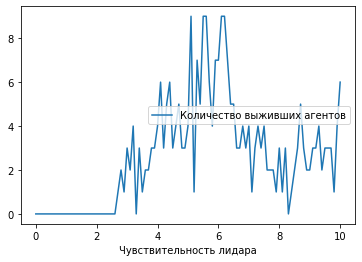

In [12]:

directory = 'run_s_5w15'
if not os.path.exists(directory):
	os.makedirs(directory)



df=pandas.DataFrame(columns=['id','Чувствительность лидара' , 'Вес скорости избегания столкновении', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов', 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость' ])
df.set_index('id', inplace=True)

w1 = 5
w2 = 1
w3=1
run=0
for SENSOR_RANGE in numpy.linspace(0, 10,101):
	ROBOT_NUMBER = 9
	DX = [-5 - ROBOT_RADIUS, 0, 5 + ROBOT_RADIUS, -5 - ROBOT_RADIUS, 0,
      5 + ROBOT_RADIUS, -ROBOT_RADIUS - 5, 0, ROBOT_RADIUS + 5]
	DY = [-5 - ROBOT_RADIUS, -5 - ROBOT_RADIUS, -5 - ROBOT_RADIUS, 0, 0, 0,
      5 + ROBOT_RADIUS, 5 + ROBOT_RADIUS, 5 + ROBOT_RADIUS]
	env = Env(
	width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=ROBOT_NUMBER,
	obstacle_pos=OBSTACLE_POS,
	desired_X=DX, desired_Y=DY, sensor_range=SENSOR_RANGE, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
	sensor_detection_count=SENSOR_DETECTION_COUNT, buffer_size=MAX_T
	)

	print(run)
	env.episode(w1, w2, w3)
	# episode_gui(env, w1, w2, w3)
	row=[SENSOR_RANGE, w1, w2, w3, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run]=row
	print(row)
	env.save_episode( os.path.join(directory, str(run)))
	run=run+1
df.plot(x=df.columns[0] , y=df.columns[4])
df.to_excel(os.path.join(directory, 'report.xls'))

In [3]:
#current_episode_replay(env)
directory='run_w1'
show_episode(directory, 98)

In [17]:
full_report='report.xls'
writer = pandas.ExcelWriter(full_report, engine='xlsxwriter')
def fill_report_with_graph(directory, input, outs=[4, 5, 6, 7], writer=writer, ax_rows=2, ax_cols=2, row_number=101):
	df=pandas.read_excel(os.path.join(directory, 'report.xls'))
	df.set_index('id', inplace=True)
	print(df.columns)
	fig, ax=plt.subplots(nrows=ax_rows, ncols=ax_cols, figsize=(15, 6))
	k=0
	for i in range(ax_rows):
		for j in range(ax_cols):
			if k==len(outs):
				break
			df.plot(ax=ax[i][j] ,x=df.columns[input] , y=df.columns[outs[k]], marker='o', grid=True)
			k=k+1

	df.to_excel(writer, sheet_name=directory)
	workbook = writer.book
	sheet=writer.sheets[directory]

	r=1
	for out in outs:
		chart = workbook.add_chart({'type': 'line'})
		chart.add_series({'categories': [directory, 1, input+1, 1+row_number, input+1],
						 'values': [directory, 1,out+1, 1+row_number,  out+1],
						 'marker': {'type': 'automatic', 'fill':   {'color': 'red'}},
						 'name': df.columns[out]})
		sheet.insert_chart('K'+str(r), chart, {'x_scale': 3, 'y_scale': 1})
		r+=20
	#workbook.close()








w2=1
w3=1

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


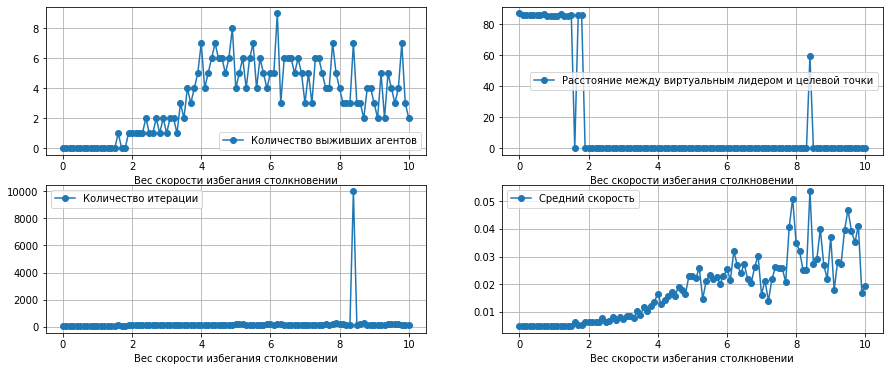

In [18]:
fill_report_with_graph('run_w1', 1)
# df=pandas.read_excel('run_w1/report.xls')
# df.plot(x=df.columns[2] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w3=1

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


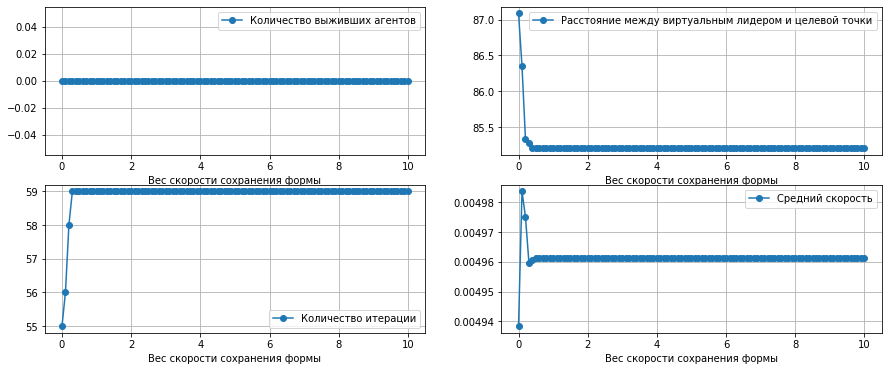

In [19]:
fill_report_with_graph('run_w2', 2)

# df=pandas.read_excel('run_w2/report.xls')
# df.plot(x=df.columns[3] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=5
w3=1

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


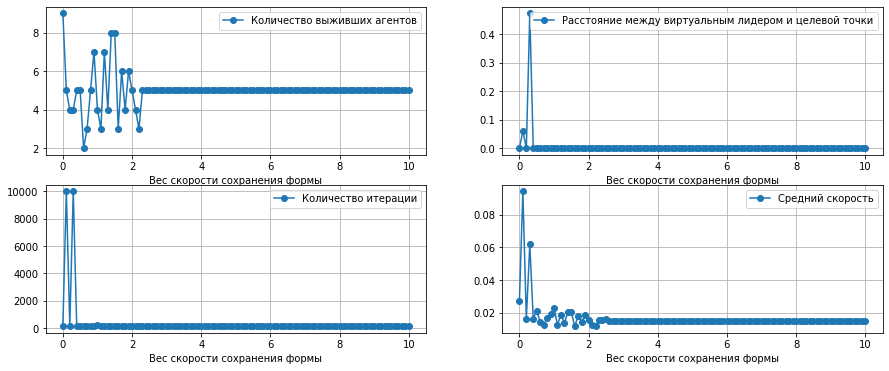

In [20]:
fill_report_with_graph('run_w2_w15', 2)

# df=pandas.read_excel('run_w2_w15/report.xls')
# df.plot(x=df.columns[3] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=1

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


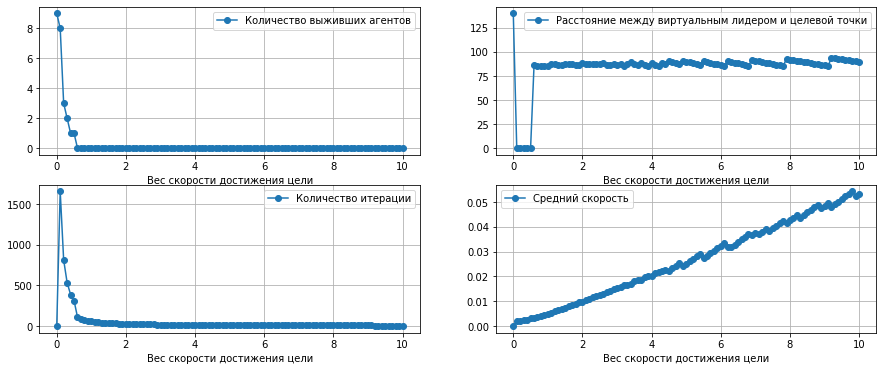

In [21]:
fill_report_with_graph('run_w3', 3)

# df=pandas.read_excel('run_w3/report.xls')
# df.plot(x=df.columns[4] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=0

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


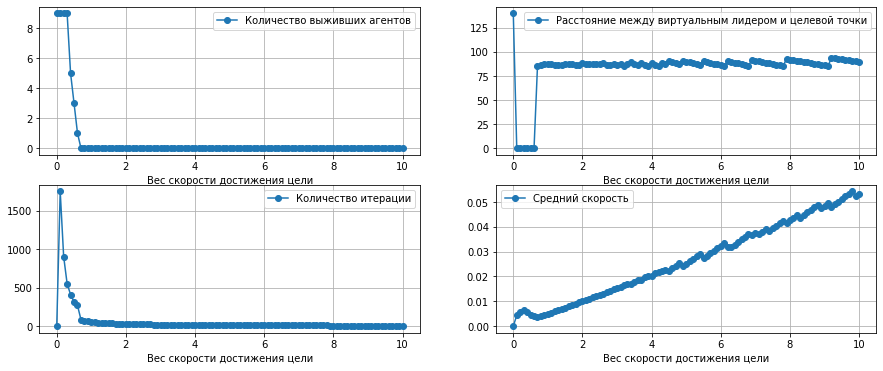

In [22]:
fill_report_with_graph('run_w3_w20', 3)

# df=pandas.read_excel('run_w3_w20/report.xls')
# df.plot(x=df.columns[4] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=5
w2=1

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


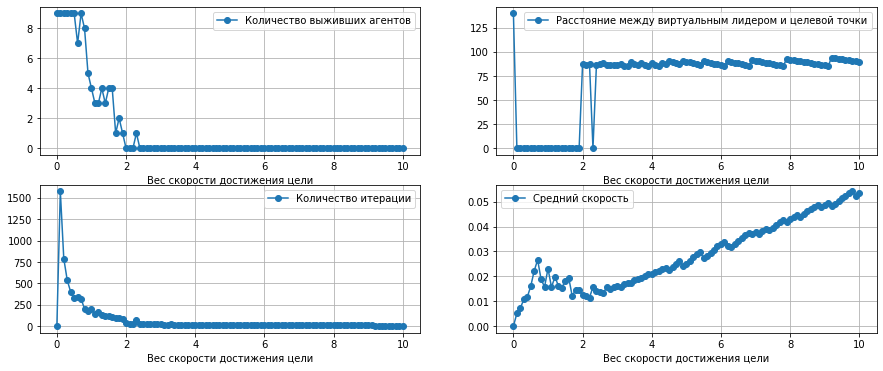

In [23]:
fill_report_with_graph('run_w3_w15', 3)

# df=pandas.read_excel('run_w3_w15/report.xls')
# df.plot(x=df.columns[4] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=1
w3=1

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


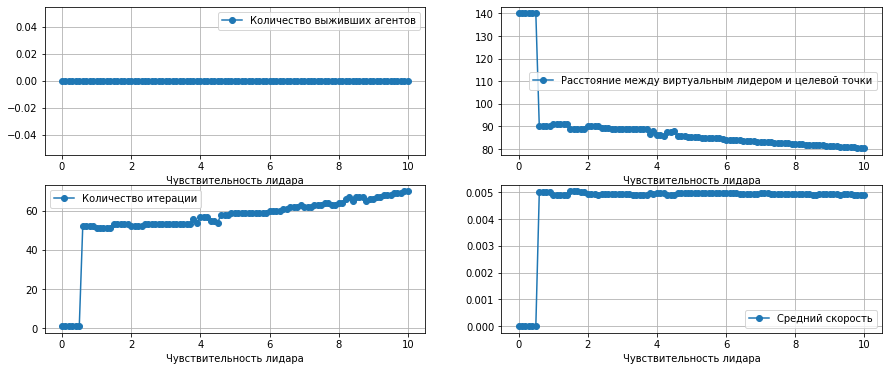

In [24]:
fill_report_with_graph('run_s', 0)

# df=pandas.read_excel('run_s/report.xls')
# df.plot(x=df.columns[1] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=5
w2=1
w3=1

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


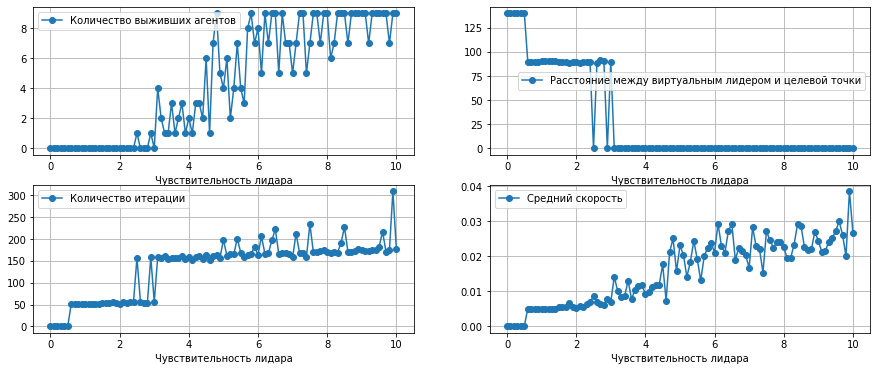

In [25]:
fill_report_with_graph('run_s_w15', 0)

# df=pandas.read_excel('run_s_w15/report.xls')
# df.plot(x=df.columns[1] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=1
w3=1
минимальный дистанция - 5

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


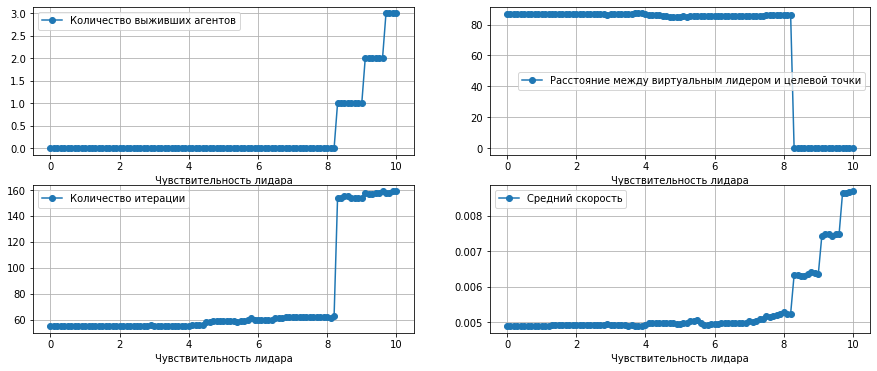

In [26]:
fill_report_with_graph('run_s_5', 0)

# df=pandas.read_excel('run_s_5/report.xls')
# df.plot(x=df.columns[1] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=5
w2=1
w3=1
минимальный дистанция - 5

Index(['Чувствительность лидара', 'Вес скорости избегания столкновении',
       'Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


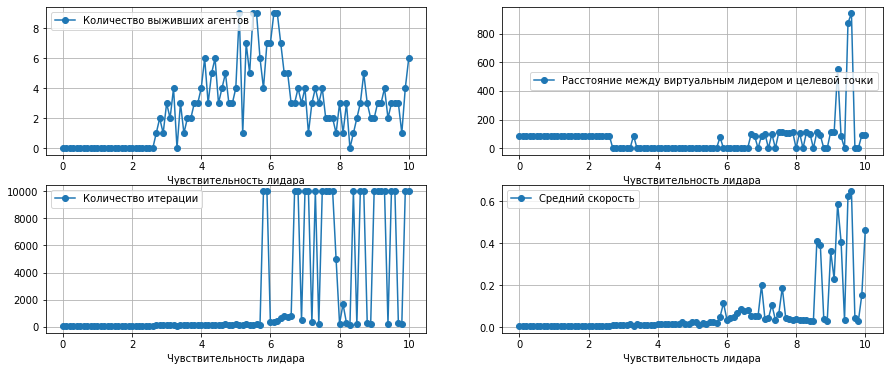

In [27]:
fill_report_with_graph('run_s_5w15', 0)

# df=pandas.read_excel('run_s_5w15/report.xls')
# df.plot(x=df.columns[1] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[1] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

In [28]:
writer.close()
